# Hi! im Rizky Anshari

Notebook ini adalah bentuk evaluasi saya dalam pembelajaran **convolutional neural network** dengan menggunakan dataset dari kaggle.

### Problem Statement

Dengan banyaknya jenis beras yang ada dipasaran ditambah penemuan varian2 baru, model ini diharapkan dapat mengklasifikasikan agar didapatkan data beras yang terstuktur

### Objective

Membuat model Deep Learning dengan motede Convolutional Neural Network (CNN) untuk membantuk mengklasifikasikan jenis beras, pada sampel ini ada 5 class/jenis beras.

### Dataset
kaggle rice image dataset

![Image](https://d3h1lg3ksw6i6b.cloudfront.net/media/image/2018/09/14/8f1dcd3093e046f398a9a39bb580880f_5+Varieties+of+Rice+In+Asia.jpg)

# Import Libraries

library yang digunakan

In [62]:
# Library yang digunakan

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

configurasi GPU

In [2]:
# GPU configurasi
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# Data Loading
loading data yang digunakan

In [3]:
# membuat batch dan img width, height
BATCH = 64
IMG_WIDTH = 96
IMG_HEIGHT = 96

set ukuran image yang akan diproses

In [4]:
# memisahkan data train dan validation
tf.random.set_seed(41)

train_data = keras.utils.image_dataset_from_directory('Rice_Image_Dataset',
                                                        validation_split = 0.2,
                                                        subset = 'training', 
                                                        seed = 100,
                                                        image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        batch_size=BATCH,
                                                        shuffle = True)

val_data = keras.utils.image_dataset_from_directory('Rice_Image_Dataset',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 100,
                                                       image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       batch_size=BATCH,
                                                       shuffle = True)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


membagi data untuk train dan validation
- ditemukan 75000 image dan 5 class
- kemudian data dibagi untuk training 60000
- dan untuk validation 15000

# Exploratory Data
exploring data, dan checking data

## Training Dataset

In [5]:
# define name class pada data train
class_names = train_data.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


pada data train didapatkan 5 class beras

2022-10-17 13:03:59.727482: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


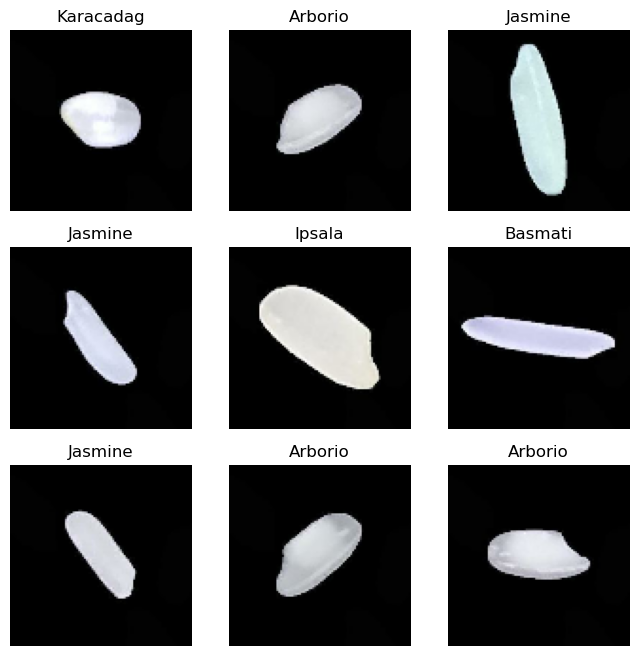

In [6]:
# menampilkan data yang ada pada dataset train dengan 5 jenis beras
plt.figure(figsize=(8, 8))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

sampel beras yang ada pada data train

## Validation Dataset

In [7]:
# define name class pada data validation
class_names = val_data.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


class yang terdapat pada data validatin sama dengan train

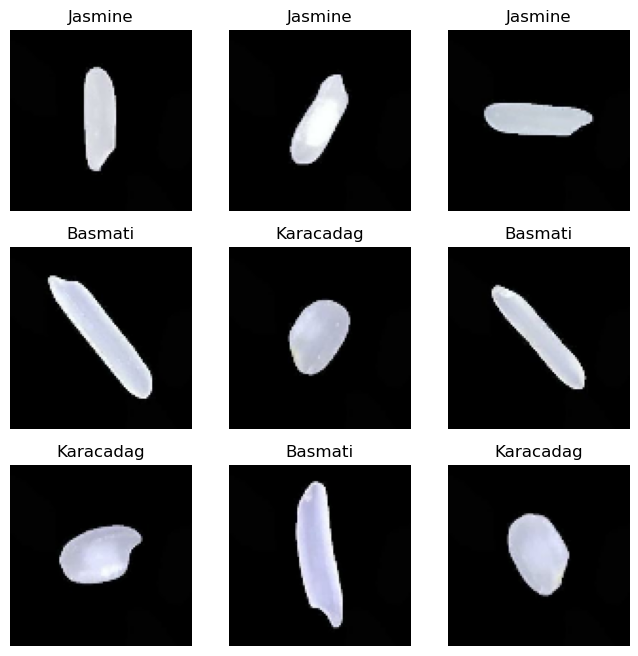

In [8]:
# menampilkan data yang ada pada dataset validation dengan 5 jenis beras
plt.figure(figsize=(8, 8))
for images, labels in val_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

sampel jenis beras yang ada pada data validation

# Data Preprocessing

In [9]:
# autotune dataset
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_data.cache().prefetch(buffer_size=AUTOTUNE)

autotune data train dan validation, untuk validation dekenakan shuffle 1000

# Base Model

In [10]:
# membuat model base
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])

- modelling menggunakan squential model
- image di rescale
- kemudian di convusional 2 dimension
- dengan padding same dan activation relu
- dan dense di ujung model
- output 5


In [11]:
# model compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

- mengunakan optimizer adam
- mengunakan SparseCategoricalCrossentropy karena output bukan binary
- dan metric acccuracy 

In [15]:
# summary base model dan params
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

ini adalah params untuk model ini
- didapatkan total params 688.037
- dan non trainable nya 0

In [16]:
# running model dengan 3 epoch untuk mengurangi runtime
epochs = 3
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
)

Epoch 1/3
938/938 [==============================] - 712s 759ms/step - loss: 1.2647 - accuracy: 0.2782 - val_loss: 1.1499 - val_accuracy: 0.4149
Epoch 2/3
938/938 [==============================] - 655s 698ms/step - loss: 1.2296 - accuracy: 0.3454 - val_loss: 1.4440 - val_accuracy: 0.5675
Epoch 3/3
938/938 [==============================] - 674s 718ms/step - loss: 1.8099 - accuracy: 0.4060 - val_loss: 2.2400 - val_accuracy: 0.3430


model sangat jauh dari sempurna, accuracy juga masih dibawah 0.8
- epoch hanya 3 dikarenakan model running cukup sangat lama dan menguras kerja laptop
- akan dilakukan perbaikan pada model improvement

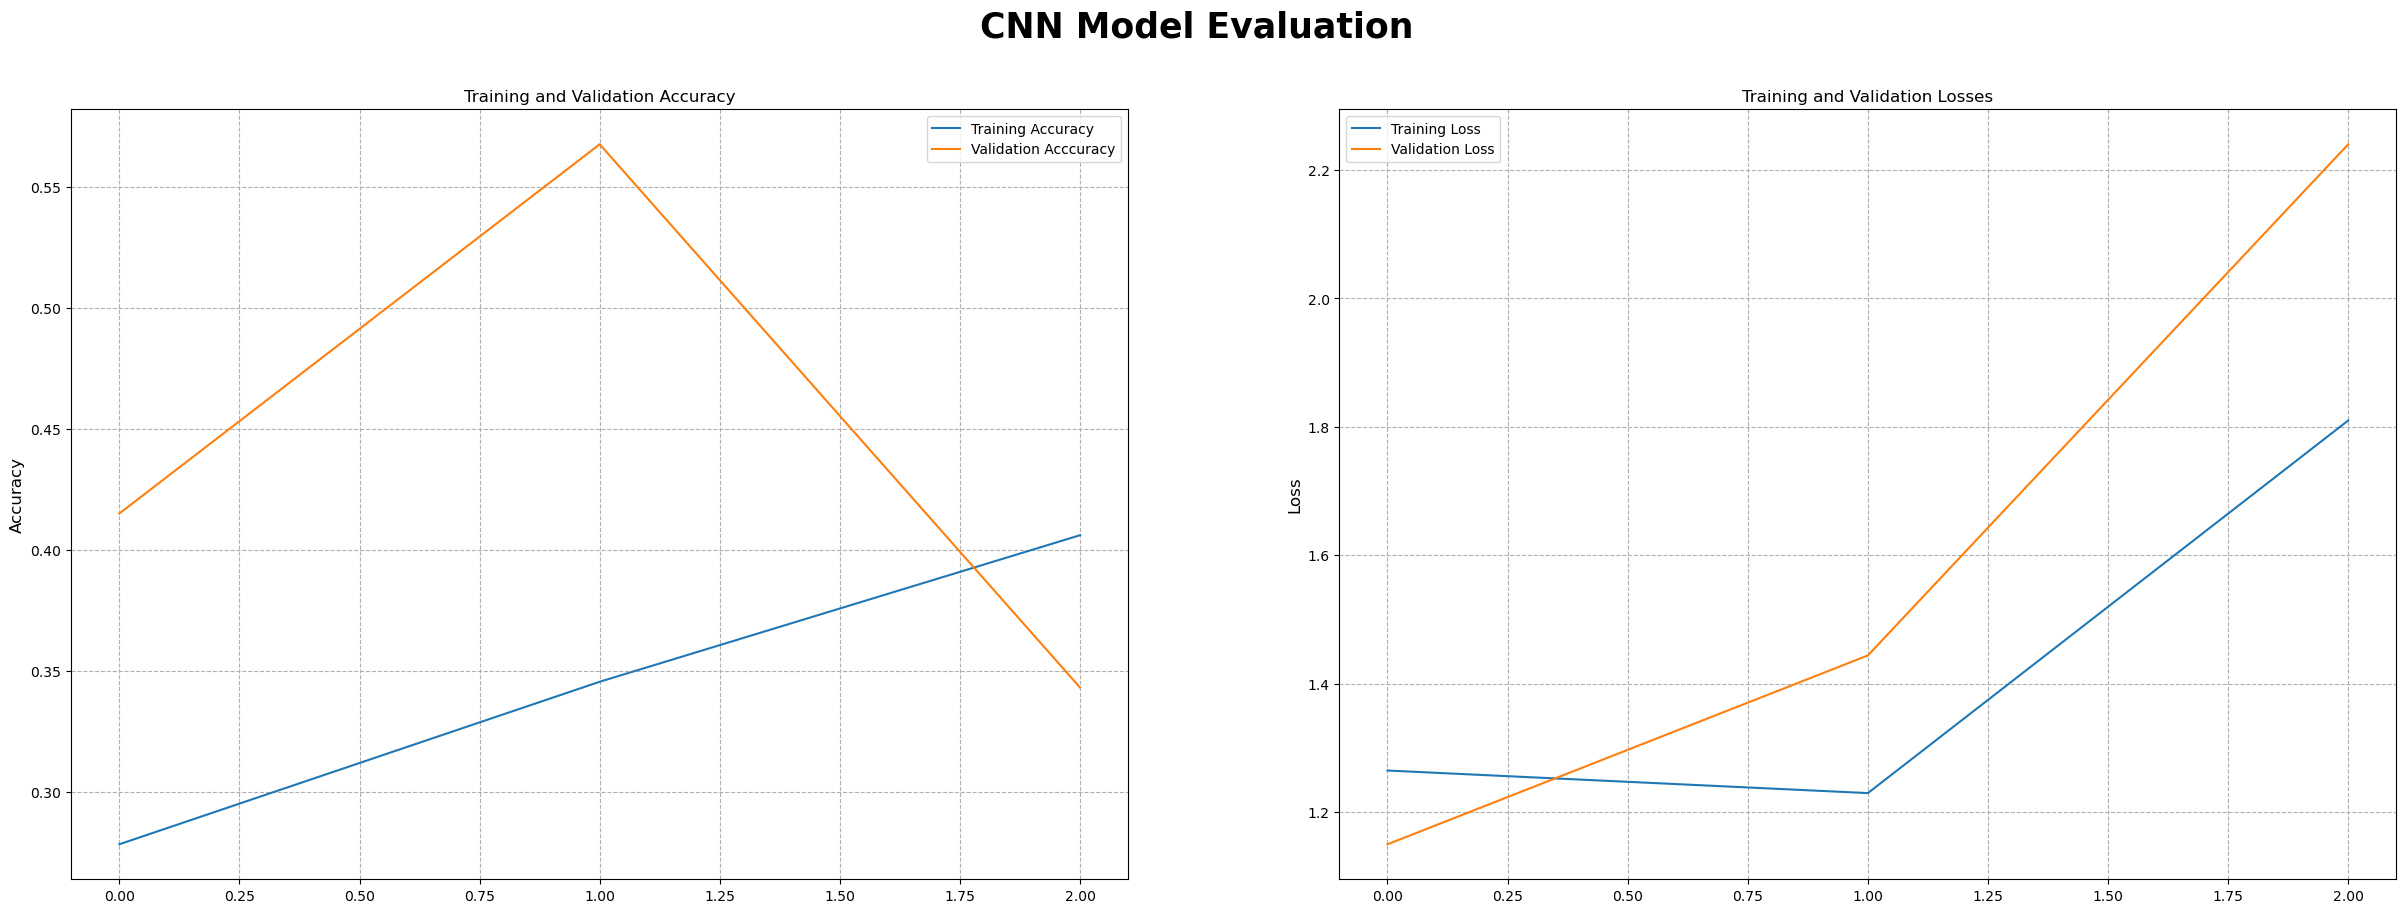

In [17]:
# visualisasi hasil accuracy dan loss pada grafik
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('CNN Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

visualisasi menggambarkan pelatihan model juga kurang optimal, dapat terlihat dari nilai train dan validation line diatas.
pada epoch pertama dan kedua model mengalami pembelajaran yang baik dan saat epoch ketiga performa model menurun

# Model Improvement

In [20]:
# menerapkan data augmentation pada base model
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model improvement menggunakan data augmentation diantaranya adalah flip horizontal, mengatur ukuran/shape, rotasi, dan zoom. dengan harapan model akan improve

In [21]:
# model improvement function
model_impr = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names))
])

ditambahkan dropout sebelum layer output

In [22]:
# compile model dengan optimizer adam
model_impr.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

untuk optimizer tetap sama yaitu adam karena adam adalah optimizer terbaik dan
karena lama menggunakan optimizer lain, learning rate tidak diatur

In [23]:
# summary model
model_impr.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 96, 96, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)       

params yang ada berjumlah 688.037 dan non trainable nya 0
- model ini juga menggunakan squential
- dengan convolution 4 kali
- pooling 4 kali
- output 5

In [24]:
# process belajar model dengan epoch 5
epochs = 5
history = model_impr.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
)

Epoch 1/5
938/938 [==============================] - 687s 731ms/step - loss: 1.5207 - accuracy: 0.3182 - val_loss: 1.6094 - val_accuracy: 0.1969
Epoch 2/5
938/938 [==============================] - 714s 761ms/step - loss: 1.6096 - accuracy: 0.2380 - val_loss: 1.6094 - val_accuracy: 0.1961
Epoch 3/5
938/938 [==============================] - 698s 745ms/step - loss: 1.6097 - accuracy: 0.2312 - val_loss: 1.6094 - val_accuracy: 0.1961
Epoch 4/5
938/938 [==============================] - 713s 760ms/step - loss: 1.6097 - accuracy: 0.2299 - val_loss: 1.6094 - val_accuracy: 0.1961
Epoch 5/5
938/938 [==============================] - 740s 788ms/step - loss: 1.6095 - accuracy: 0.2168 - val_loss: 1.6094 - val_accuracy: 0.1961


setelah dilakukan train ternyata hasil yang didapatkan tidak berbeda significant, pada awal2 model belajar baik menyentuh accuracy 0.6 tetapi kemudian menurun.

- pada run sebelumnya dengan epoch 20 accuracy cukup bagus 0.91 tetapi karena kesalahan penulis meng interupt karena waktu yang lama dan khawatir model overfitting, kemudian diganti epoch kecil tetapi accuracy tidak kembali ke angka sebelumnya

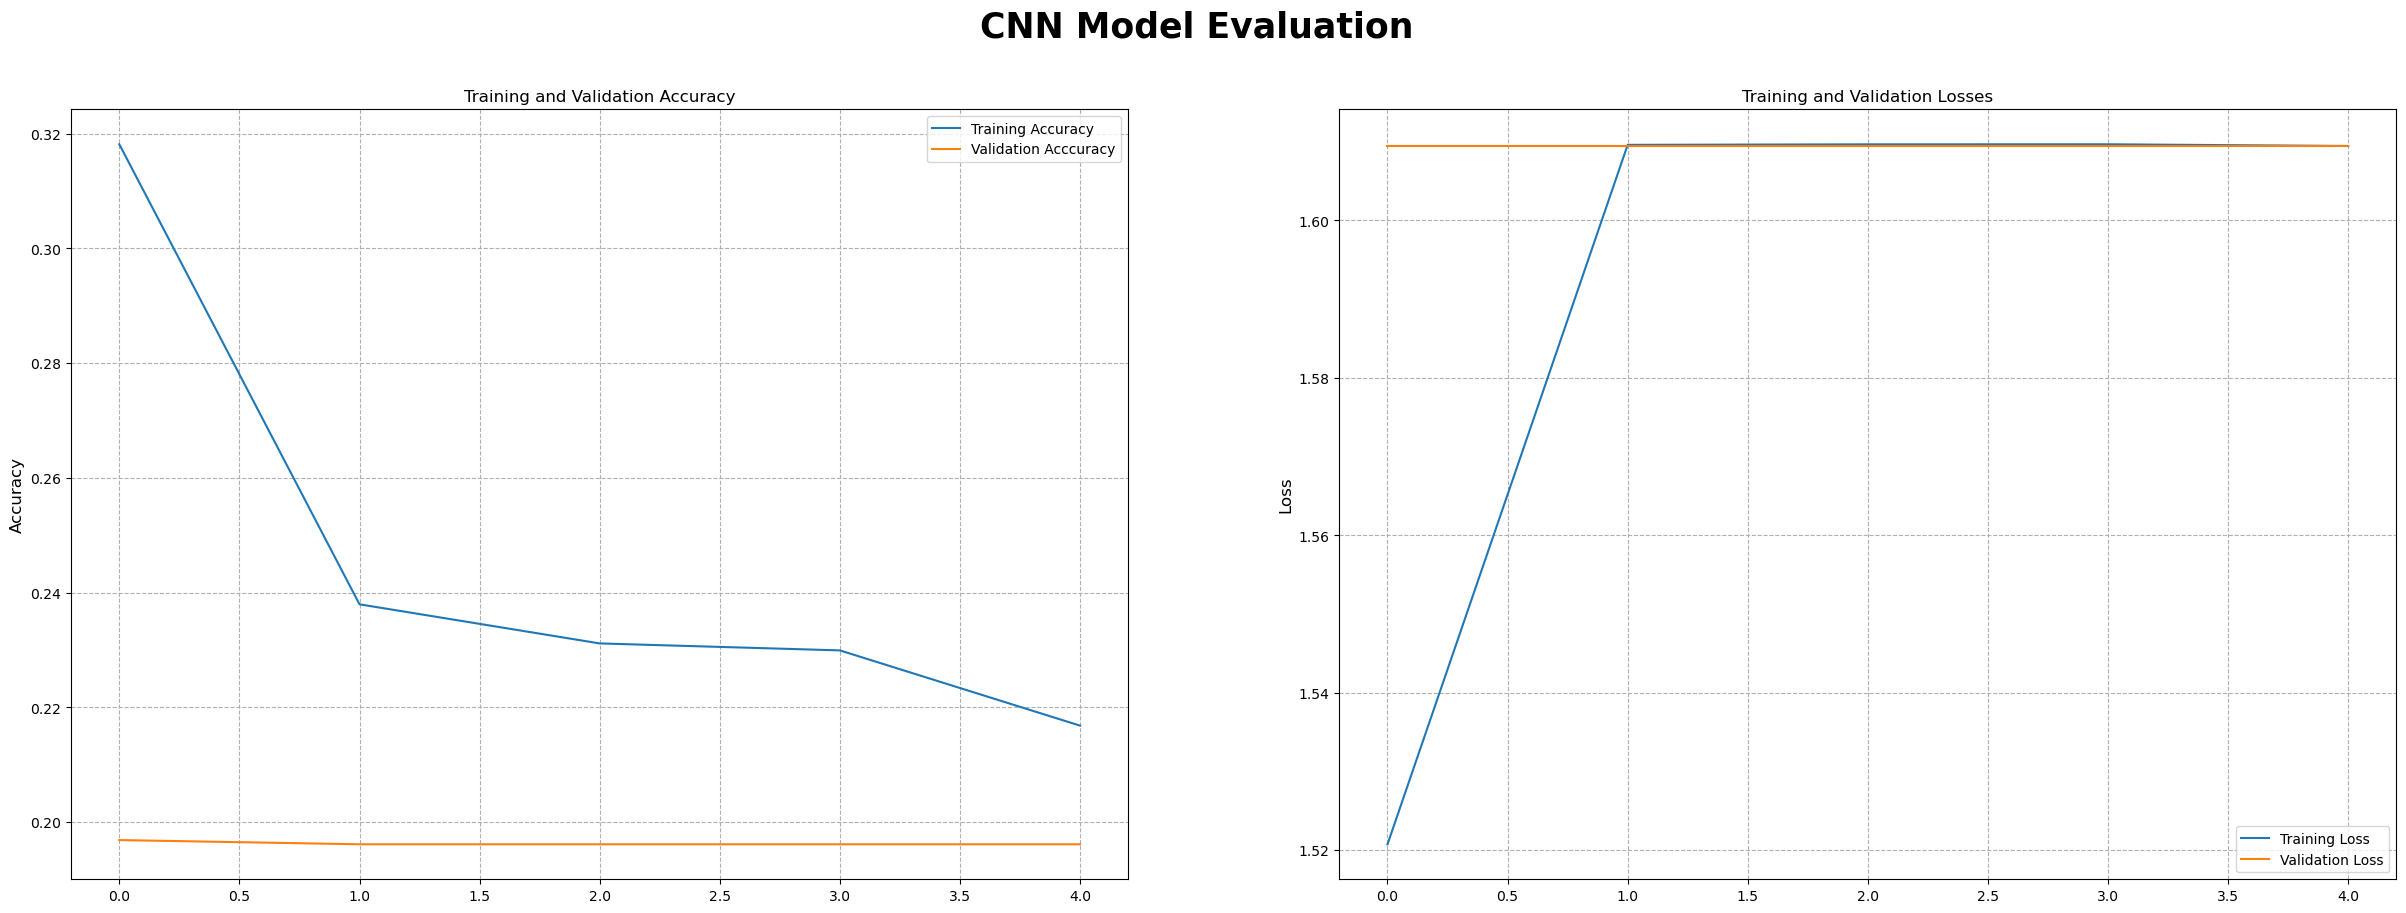

In [45]:
# menampilkan plot grafik untuk accuracy dan loss
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('CNN Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

line accuracy dan loss pada train dan validation untuk membaca dengan lebih jelas
- seperti tulisan sebelum ini yaitu model masih jauh dari sempurna
- model juga mengalami penurunan performance
- penambahan data augmentasi tidak berjalan baik

# Model Evaluation

setelah dilakukan 2 kali modelling dengan parameter yang berbeda didapatkan model yang tidak terlalu baik, tetapi untuk kedua jenis model ini model yang lebih baik adalah model yang pertama, oleh karena itu model ini akan disave dan digunakan sebagai acuan model computer vision version pertama, dengan catatan- catatan besar yang harus diperbaiki.
- **pengolahan data awal**
- **preprpcessing data yang lebih baik**
- **pertimbangkan parameter yang digunakan**
- **dapat dipertibangakan menggunakan model funcional api untuk perbandingan**
- **yang menjadi headline perbaikan yaitu pada preprocessing datanya**

# Model Save
Pada bagian ini model dengan performa paling baik yang dalam kasus ini adalah model pertama akan disimpan menjadi `model.h5`.

In [46]:
model.save('model.h5')

# Model Inference

In [55]:
# Defining testing image
test_image1 = r'inference/Arborio.jpg'
test_image2 = r'inference/basmati.jpg'
test_image3 = r'inference/Ipsala.jpg'
test_image4 = r'inference/Jasmine.jpg'
test_image5 = r'inference/Karacadag.jpg'

# Image predict
img1 = keras.preprocessing.image.load_img(test_image1, target_size=(IMG_HEIGHT, IMG_WIDTH))
img2 = keras.preprocessing.image.load_img(test_image2, target_size=(IMG_HEIGHT, IMG_WIDTH))
img3 = keras.preprocessing.image.load_img(test_image3, target_size=(IMG_HEIGHT, IMG_WIDTH))
img4 = keras.preprocessing.image.load_img(test_image4, target_size=(IMG_HEIGHT, IMG_WIDTH))
img5 = keras.preprocessing.image.load_img(test_image5, target_size=(IMG_HEIGHT, IMG_WIDTH))

sampel image perclass load dan dipredict

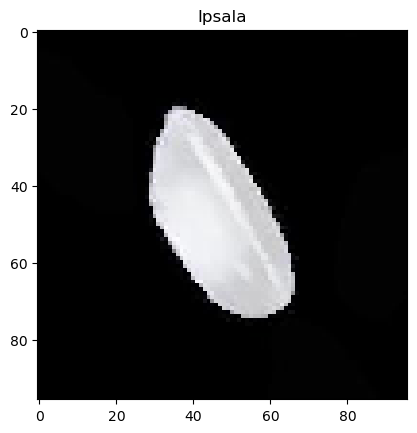

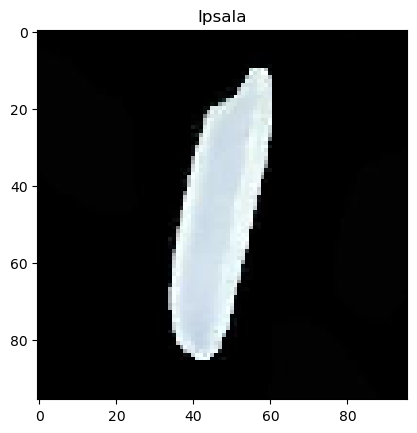

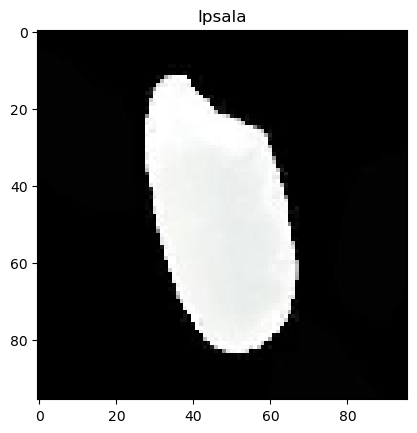

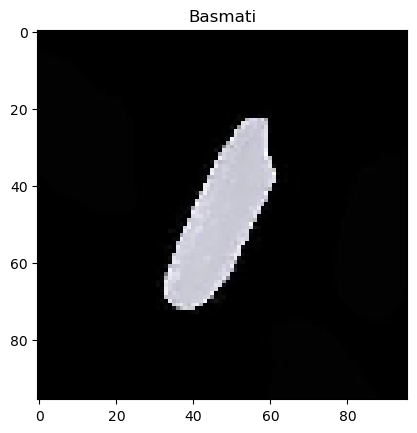

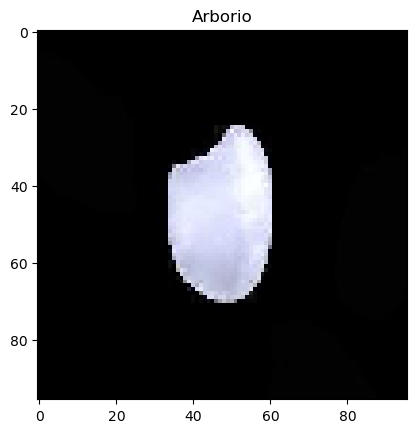

In [63]:
# predict image
images = [img1, img2, img3, img4, img5]

for img in images:
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0]) 

  plt.figure()
  plt.imshow(img)
  plt.title(train_data.class_names[np.argmax(score)])

dari kelima sampel class gambar predict model mendapatkan kesesuaian gambar pada salah satu nya, yaitu untuk jenis beras ipsala. sedangkan untuk jenis lain tidak terpredict.

**artinya model version 1 memiliki kelebihan yaitu sangat baik dalam memprediksi jenis beras ipsala.**

# Conclusion

Kesimpulan dari project awal ini pada proses EDA dan Modelling adalah,

Dataset yang digunakan berjumlah 75000 gambar, dengan gambar yang seragam, pada beberapa gambar terlhat kontras warna berbeda, ada yang memiliki gambar beras agak kekuningan, kemerahan, dan lain sebagainya.

Pada data beras, terdapat 5 class/jenis. untuk jenis2nya yaitu jenis Arborio, Basmati, Ipsala, Jasmine, Karacadag.

Untuk menseragamkan gambar maka dilakukan preprocessing setiap gambarnya menjadi 224x224 pixel, dan dilakukan permodelan dengan ANN menggnakan 4 convolutional layer dan 4 pooling layer. accuracy dan loss masih tergolong tidak optimal

Karena model ini tidak terlalu baik, maka dilakukan modelling kedua dengan menambahkan augmentation dan dropout juga parameter lainnya, untuk hidden layer perlakuannya tetap sama, pada model kedua ini result yang didapat kembali tidak cukup optimal bahkan masih lebih baik model pertamanya

Penulis tidak melakukan epoc yang lebih besar dikarenakan running yang sangat lama dan karena memang kualitas gambarnya snagat bagus, harus dilakukan pengurangan terlebih dahulu untuk meringankan kinerja komputasi

**Penulis belum mengetahui bagaimana jadinya jika model ini menerapkan epoch yang lebih besar seperti 20 sampai 25 epoch, hasil nya mungkin akan lebih baik.**

Model yang disimpan adalah model pertamanya, dengan asumsi model ini lebih baik dari pada model kedua, model pertama disimpan dan akan dijadikan model version 1 pada project ini.

**Penulis akan melakukan perbaikan pada project version 2 
untuk mengetahui kesalahan dan perlakuan yang tepat terhadap data.**